In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree,set_config
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_columns', 500)
set_config(print_changed_only = False)

In [3]:
car_data = pd.read_csv('car_evaluation.csv')

In [4]:
car_data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
car_data.shape

(1727, 7)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
# Rename Column name
car_data.rename(columns = {'vhigh':'buying_price','vhigh.1':'maintenance_cost','2':'number_of_doors','2.1':'number_of_persons','small':'lug_boot','low':'safety','unacc':'decision'}, inplace = True)

In [8]:
car_data['buying_price'].value_counts()

high     432
low      432
med      432
vhigh    431
Name: buying_price, dtype: int64

In [9]:
ds_ = car_data.select_dtypes(exclude=['int', 'float'])
for col in ds_.columns:
    print()
    print(col)
    print(ds_[col].unique()) # to print categories name only
    print(ds_[col].value_counts(),"\r") # to print count of every category


buying_price
['vhigh' 'high' 'med' 'low']
high     432
low      432
med      432
vhigh    431
Name: buying_price, dtype: int64 

maintenance_cost
['vhigh' 'high' 'med' 'low']
high     432
low      432
med      432
vhigh    431
Name: maintenance_cost, dtype: int64 

number_of_doors
['2' '3' '4' '5more']
5more    432
4        432
3        432
2        431
Name: number_of_doors, dtype: int64 

number_of_persons
['2' '4' 'more']
4       576
more    576
2       575
Name: number_of_persons, dtype: int64 

lug_boot
['small' 'med' 'big']
big      576
med      576
small    575
Name: lug_boot, dtype: int64 

safety
['med' 'high' 'low']
high    576
med     576
low     575
Name: safety, dtype: int64 

decision
['unacc' 'acc' 'vgood' 'good']
unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64 


In [10]:
def missing_data(df):
    total = car_data.isnull().sum().sort_values(ascending = False)
    percent = round(car_data.isnull().sum().sort_values(ascending = False) * 100 /len(car_data),2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [11]:
missing_data(car_data)

,Total,Percent
buying_price,0,0.0
maintenance_cost,0,0.0
number_of_doors,0,0.0
number_of_persons,0,0.0
lug_boot,0,0.0
safety,0,0.0
decision,0,0.0


In [12]:
car_data.describe()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,big,high,unacc
freq,432,432,432,576,576,576,1209


In [13]:
def draw(graph):
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 5,height ,ha= "center")

Text(0, 0.5, 'Total Counts')

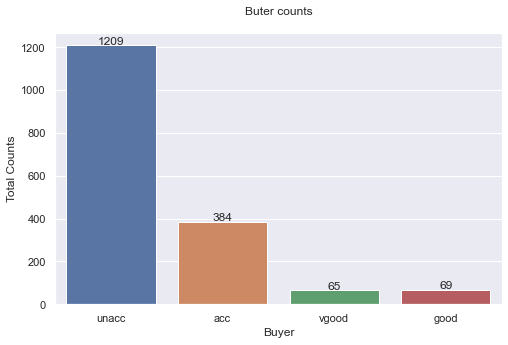

In [14]:
# BuyerCount = Final_Data['buyer'].value_counts().nlargest()
# print(BuyerCount)
sns.set(style="darkgrid")
plt.figure(figsize = (8, 5))
graph= sns.countplot(x='decision', data=car_data)
draw(graph)
plt.title('Buter counts\n')
plt.xlabel('Buyer')
plt.ylabel('Total Counts')

In [15]:
car_data.columns

Index(['buying_price', 'maintenance_cost', 'number_of_doors',
       'number_of_persons', 'lug_boot', 'safety', 'decision'],
      dtype='object')

In [16]:
def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])
columnlist=['buying_price', 'maintenance_cost', 'number_of_doors','number_of_persons', 'lug_boot', 'safety', 'decision']
MultiLabelEncoder(columnlist,car_data)

In [17]:
X = car_data.drop(["decision"],axis=1)
Y = car_data["decision"]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [18]:
DT_model = DecisionTreeClassifier(criterion='entropy')

In [19]:
DT = DT_model.fit(Train_X, Train_Y)#.best_estimator_
pred = DT.predict(Test_X)

In [20]:
def Classification_Summary(pred,pred_prob,i):
    Accuracy=round(accuracy_score(Test_Y, pred),3)*100   
    Precision =round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Recall=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    F1_score=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))

In [21]:
pred_prob = DT.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,1)

Accuracy = 97.39999999999999%
F1 Score = 97.39999999999999%

 Confusiton Matrix:
 [[ 69   3   5   0]
 [  1  13   0   0]
 [  0   0 239   0]
 [  0   0   0  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        77
           1       0.81      0.93      0.87        14
           2       0.98      1.00      0.99       239
           3       1.00      1.00      1.00        16

    accuracy                           0.97       346
   macro avg       0.94      0.96      0.95       346
weighted avg       0.98      0.97      0.97       346



In [22]:
# plt.figure(figsize=(30,15))
# tree.plot_tree(DT)

# plt.show()

In [23]:
pred_df=pd.DataFrame({'Actual Value':Test_Y,'Predicted Value':pred,'Difference':Test_Y-pred})

In [24]:
pred_df

,Actual Value,Predicted Value,Difference
1318,0,0,0
124,2,2,0
648,2,2,0
249,2,2,0
1598,2,2,0
...,...,...,...
1481,2,2,0
1327,2,2,0
317,2,2,0
142,2,2,0


In [25]:
X1 = car_data.drop(["decision"],axis=1)
Y1 = car_data["decision"]
Train_X1, Test_X1, Train_Y1, Test_Y1 = train_test_split(X1, Y1, train_size=0.8, test_size=0.2, random_state=0)

In [26]:
DT_model1 = DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

In [27]:
DT1 = DT_model1.fit(Train_X1, Train_Y1)#.best_estimator_
pred1 = DT.predict(Test_X1)

In [28]:
def Classification_Summary(pred1,pred_prob1,i1):
    Accuracy1=round(accuracy_score(Test_Y1, pred1),3)*100   
    Precision1 =round(precision_score(Test_Y1, pred1, average='weighted'),3)*100 #
    Recall1=round(recall_score(Test_Y1, pred1, average='weighted'),3)*100 #
    F1_score1=round(f1_score(Test_Y1, pred1, average='weighted'),3)*100 #
#     print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*25,Evaluation_Results.index[i], '-'*25,'>'*3))
    print('Accuracy1 = {}%'.format(round(accuracy_score(Test_Y1, pred1),3)*100))
    print('F1 Score1 = {}%'.format(round(f1_score(Test_Y1, pred1, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix1 :\033[0m\n',confusion_matrix(Test_Y1, pred1))
    print('\n\033[1mClassification Report1 :\033[0m\n',classification_report(Test_Y1, pred1))

In [29]:
pred_prob1 = DT.predict_proba(Test_X1)
Classification_Summary(pred1,pred_prob1,1)

Accuracy1 = 97.39999999999999%
F1 Score1 = 97.39999999999999%

 Confusiton Matrix1 :
 [[ 69   3   5   0]
 [  1  13   0   0]
 [  0   0 239   0]
 [  0   0   0  16]]

Classification Report1 :
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        77
           1       0.81      0.93      0.87        14
           2       0.98      1.00      0.99       239
           3       1.00      1.00      1.00        16

    accuracy                           0.97       346
   macro avg       0.94      0.96      0.95       346
weighted avg       0.98      0.97      0.97       346



In [31]:
pred_df1=pd.DataFrame({'Actual Value':Test_Y1,'Predicted Value':pred1,'Difference':Test_Y1 - pred1})

In [32]:
pred_df1

,Actual Value,Predicted Value,Difference
1318,0,0,0
124,2,2,0
648,2,2,0
249,2,2,0
1598,2,2,0
...,...,...,...
1481,2,2,0
1327,2,2,0
317,2,2,0
142,2,2,0
